# Data Analysis - Coursera Course Dataset

Project focuses on analyzing the Coursera Course dataset using Pandas. The objective is to explore various data processing techniques, including data cleaning, exploratory data analysis (EDA), and visulization. The dataset contains the Coursera Course dataset and includes various features such as course titles, organizations, available course certifications, ratings, difficulty level and enrolled student numbers.

### Importing Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

%matplotlib inline
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.2f}'.format

### Data Cleaning

In this section will be checked missing valuestaset has already been curated, outliers will not be treated.

In [25]:

file_path = 'coursea_data.csv'
df = pd.read_csv(file_path) 

In [26]:

def clean_data(df):
 
    missing_count = df.isnull().sum().sum()  
    duplicate_count = df.duplicated().sum()  

    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)
        print("Dropped column: 'Unnamed: 0'.")  # Column didn't provide useful info.

    

    print(f"Missing values in dataset: {missing_count}")
    print(f"Duplicate rows in dataset: {duplicate_count}")

    return df


df = clean_data(df)
df.head()


Dropped column: 'Unnamed: 0'.
Missing values in dataset: 0
Duplicate rows in dataset: 0


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner (SSCP),(ISC)²,SPECIALIZATION,4.70,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal Effects from Observational Data,University of Pennsylvania,COURSE,4.70,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.50,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.70,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.80,Mixed,320k


As the necessary data is cleaned, certain formatting adjustments still need to be made.

### Formatting data

In [27]:
df.rename(columns={'course_title': 'title', 
                   'course_organization': 'organization', 
                   'course_Certificate_type': 'certificate_type', 
                   'course_rating': 'rating', 
                   'course_difficulty': 'difficulty', 
                   'course_students_enrolled': 'n_students'}, 
          inplace=True)


df['certificate_type'] = df['certificate_type'].apply(lambda x: x.capitalize() if isinstance(x, str) else x)

# Function to convert 'k' / 'm' to numbers
def convert_to_number(string):
    if isinstance(string, str):  
        string = string.lower().strip()
        if 'k' in string:
            return float(string.replace('k', '')) * 1000
        elif 'm' in string:
            return float(string.replace('m', '')) * 1000000
    return string  

# Apply the conversion function to 'n_students', handling NaN and missing values
df['n_students'] = df['n_students'].apply(lambda x: convert_to_number(x) if pd.notna(x) else 0)

# Ensure 'n_students' is of integer type
df['n_students'] = df['n_students'].astype(int)


df.head()


,title,organization,certificate_type,rating,difficulty,n_students
0,(ISC)² Systems Security Certified Practitioner (SSCP),(ISC)²,Specialization,4.70,Beginner,5300
1,A Crash Course in Causality: Inferring Causal Effects from Observational Data,University of Pennsylvania,Course,4.70,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,Course,4.50,Mixed,130000
3,A Law Student's Toolkit,Yale University,Course,4.70,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,Course,4.80,Mixed,320000


### Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the essential process of examining data through summary statistics and visualizations to identify patterns, detect anomalies, test hypotheses, and validate assumptions.

### Database overview

In [28]:
# Dataset Overview
def dataset_overview(df):
   
    num_rows, num_columns = df.shape
    print(f"Number of observations: {num_rows}")
    print(f"Number of features: {num_columns}")
    print("\nColumn Data Types:\n", df.dtypes)
    

    categorical_features = df.select_dtypes(include=['object']).columns.tolist()

    numeric_features = df.select_dtypes(include=['number']).columns.tolist()

    print("\nCategorical Features:", categorical_features)
    print("Numeric Features:", numeric_features)

dataset_overview(df)

Number of observations: 891
Number of features: 6

Column Data Types:
 title                object
organization         object
certificate_type     object
rating              float64
difficulty           object
n_students            int32
dtype: object

Categorical Features: ['title', 'organization', 'certificate_type', 'difficulty']
Numeric Features: ['rating', 'n_students']


In [29]:
df.describe()

,rating,n_students
count,891.00,891.00
mean,4.68,"90,552.08"
std,0.16,"181,936.45"
min,3.30,"1,500.00"
25%,4.60,"17,500.00"
50%,4.70,"42,000.00"
75%,4.80,"99,500.00"
max,5.00,"3,200,000.00"


The dataset contains 891 observations and 6 features, with a mix of categorical and numeric data.
Categorical features include course-related attributes like title, organization, certificate type, and difficulty.
Numeric features are rating and number of students enrolled (n_students).
Ratings are generally high, averaging 4.68, with a small standard deviation (0.16), suggesting most ratings are clustered around this value.
Number of students per course varies widely, with a median of 42,000, but a maximum of 3.2 million, indicating some highly popular courses skewing the distribution.

### Numerical Overview

### Course Rating Distribution
Understanding the distribution of ratings, gain insights into the overall satisfaction of students, identify patterns, and uncover areas for improvement.

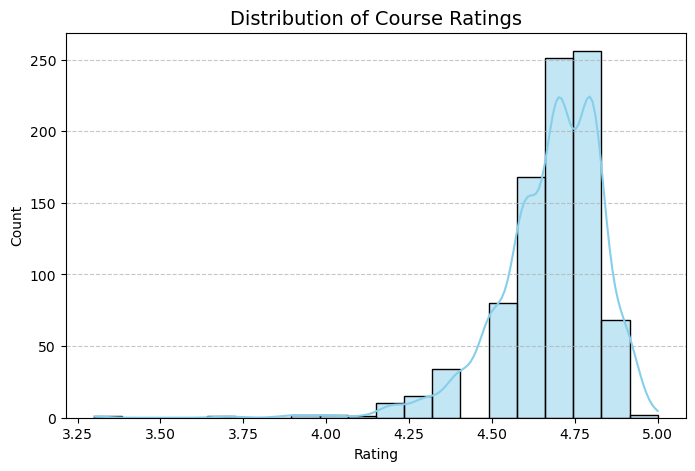

In [30]:
plt.figure(figsize=(8, 5))

sns.histplot(df['rating'], bins=20, kde=True, color="skyblue")


plt.title('Distribution of Course Ratings', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Course ratings are concentrated around 4.75. Course rating 4.25 and under are considered low-rated couses and distribution is minimal.

### Difficulty level Distribution
Comparison provides insights into the availability and popularity of courses at various difficulty levels, helping learners, educators, and institutions make informed decisions.
Hypothesis: Courses that offer professional certifications have higher enrollment numbers compared to other types of certifications.

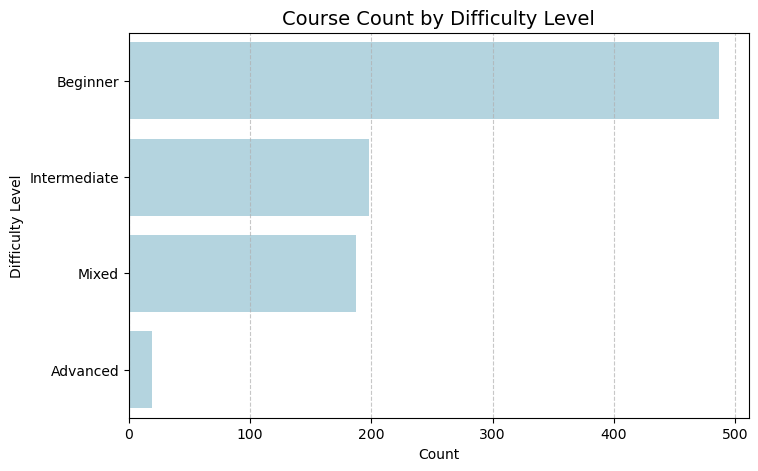

In [31]:
plt.figure(figsize=(8, 5))

light_blue_color = "#add8e6"

sns.countplot(y=df['difficulty'], 
              order=df['difficulty'].value_counts().index, 
              color=light_blue_color, 
              legend=False)


plt.title('Course Count by Difficulty Level', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Difficulty Level')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Beginner courses are the most popular, with Intermediate and Mixed levels tied in popularity. Advanced courses, however, have the least interest. Learners are intrested in entery-level learning.

**Frequency Distribution based on difficulty** 
Comparison sheds light on how courses are distributed across different levels of difficulty, providing insights into learner preferences, course availability, and areas for potential development.
Hypothesis: Beginner-level courses have higher ratings compared to intermediate and advanced courses.

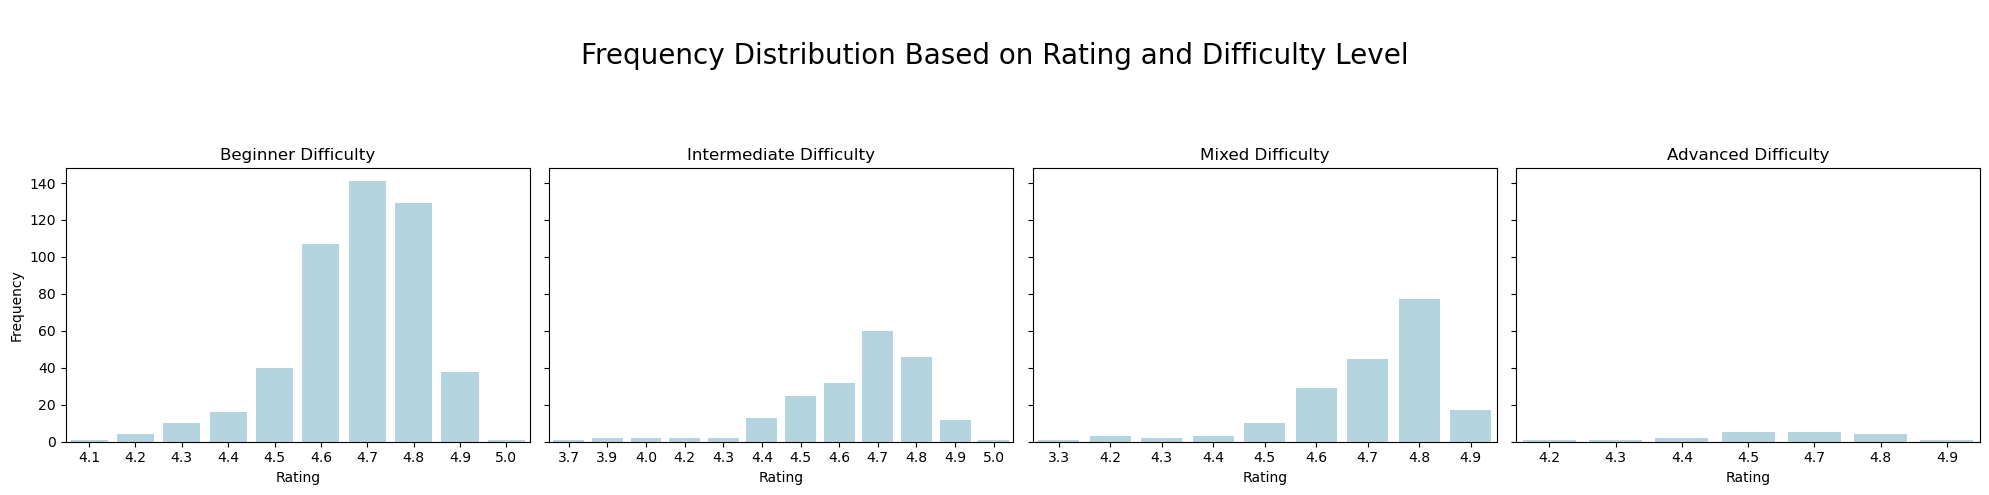

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

difficulty_levels = ["Beginner", "Intermediate", "Mixed", "Advanced"]

light_blue_color = "#add8e6"

for ax, difficulty in zip(axes, difficulty_levels):
    sns.countplot(x="rating", data=df[df["difficulty"] == difficulty], ax=ax, color=light_blue_color)
    ax.set_title(f"{difficulty} Difficulty")
    ax.set_xlabel("Rating")
    ax.set_ylabel("Frequency")

fig.suptitle("\nFrequency Distribution Based on Rating and Difficulty Level\n", fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Beginner Courses: Highest frequency, indicating strong demand for entry-level education.
- Intermediate and Mixed Levels: Notable presence, showing interest in skill advancement and blended difficulties.
- Advanced Courses: Lowest frequency, suggesting either lower demand or fewer offerings.

These insights reveal learner preferences and help in understanding where there might be opportunities to develop more courses, especially at the Advanced level. They also highlight the importance of maintaining high-quality beginner courses to cater to the largest group of learners.


### Certification Types Distribution

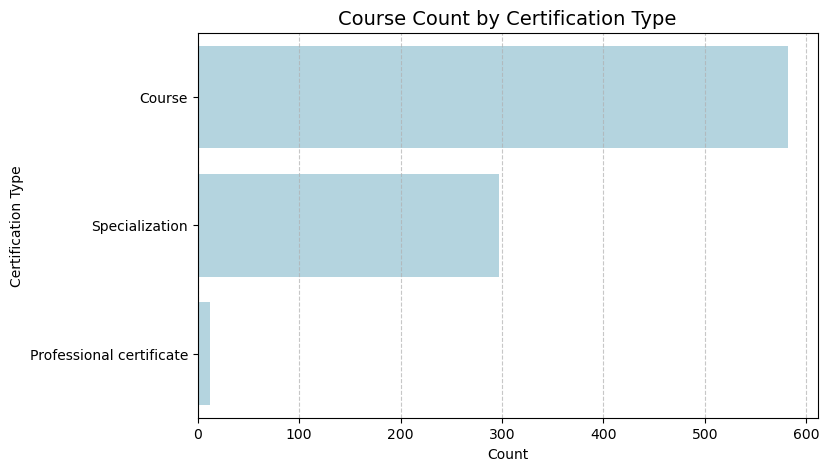

In [33]:
plt.figure(figsize=(8, 5))

light_blue_color = "#add8e6"

sns.countplot(y=df['certificate_type'], 
              order=df['certificate_type'].value_counts().index, 
              color=light_blue_color, 
              legend=False)

plt.title('Course Count by Certification Type', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Certification Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


The most popular certification type is "Course," with nearly 600 offerings. "Specialization" follows with around 300 courses, while "Professional Certification" is the least popular.

Analyzing the highest-rated courses for each difficulty level (Beginner, Intermediate, Advanced) to see which courses stand out within each difficulty category.

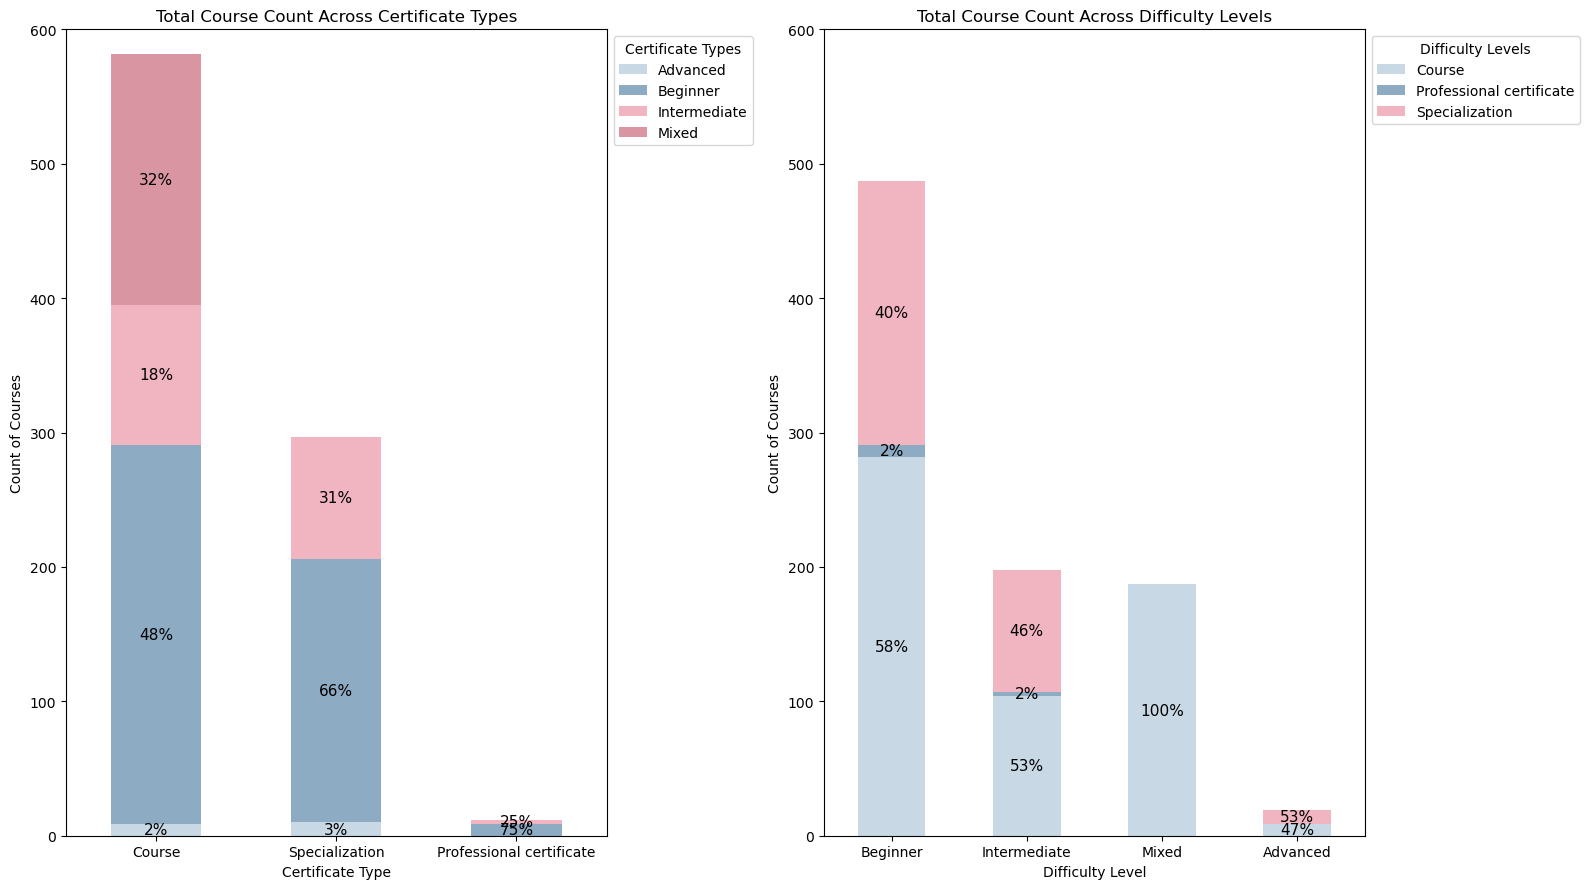

In [34]:
cert_custom_order = ['Professional certificate', 'Specialization', 'Course']
diff_custom_order = ['Advanced', 'Mixed', 'Intermediate', 'Beginner']

pastel_blues_reds = ["#C8D9E5", "#8EABC4", "#F0B5C1", "#D996A2", "#B67686"]

# Function to plot stacked bar chart with counts and percentage labels
def plot_stacked_bar(df, index, columns, ax, title, xlabel, ylabel, palette, legend_title):
    crosstab = pd.crosstab(df[index], df[columns])
    
    # Sort rows by total counts in descending order
    crosstab = crosstab.loc[crosstab.sum(axis=1).sort_values(ascending=False).index]

    totals = crosstab.sum(axis=1)
    percentages = crosstab.div(totals, axis=0) * 100

    crosstab.plot(kind='bar', stacked=True, ax=ax, color=sns.color_palette(palette))

    # Adding percentage labels
    for container in ax.containers:
        labels = [f'{v.get_height() / totals.iloc[i] * 100:.0f}%' 
                 if v.get_height() / totals.iloc[i] * 100 >1 else '' 
                  for i, v in enumerate(container)]
        ax.bar_label(container, labels=labels, label_type='center', fontsize=11)  

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(0, 600)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    ax.legend(title=legend_title, loc='upper left', bbox_to_anchor=(1, 1))
    ax.grid(False, axis='x') 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))

plot_stacked_bar(df, 'certificate_type', 'difficulty', ax1,
                 'Total Course Count Across Certificate Types', 'Certificate Type', 'Count of Courses', pastel_blues_reds, 'Certificate Types')

plot_stacked_bar(df, 'difficulty', 'certificate_type', ax2,
                 'Total Course Count Across Difficulty Levels', 'Difficulty Level', 'Count of Courses', pastel_blues_reds, 'Difficulty Levels')

plt.tight_layout()
plt.show()

- Certificate type chart  - 'Course' certificate type leads in course numbers, mostly at the 'Beginner' level (48%). 'Specialization' focuses on 'Beginner' (66%) and 'Intermediate' (31%) levels. 'Professional Certificates' have few courses, mainly 'Beginner'.
- Difficulty level chart: Predominantly 'Beginner' level courses (58% are 'Course' type). 'Intermediate' and 'Mixed' have fewer courses; 'Intermediate' is split between 'Course' and 'Specialization'. 'Advanced' level is least represented, focusing on introductory and intermediate content.

### Top Organizations Offering Courses

Assumption: Courses offered by well-known or prestigious organizations receive higher ratings compared to lesser-known organizations.

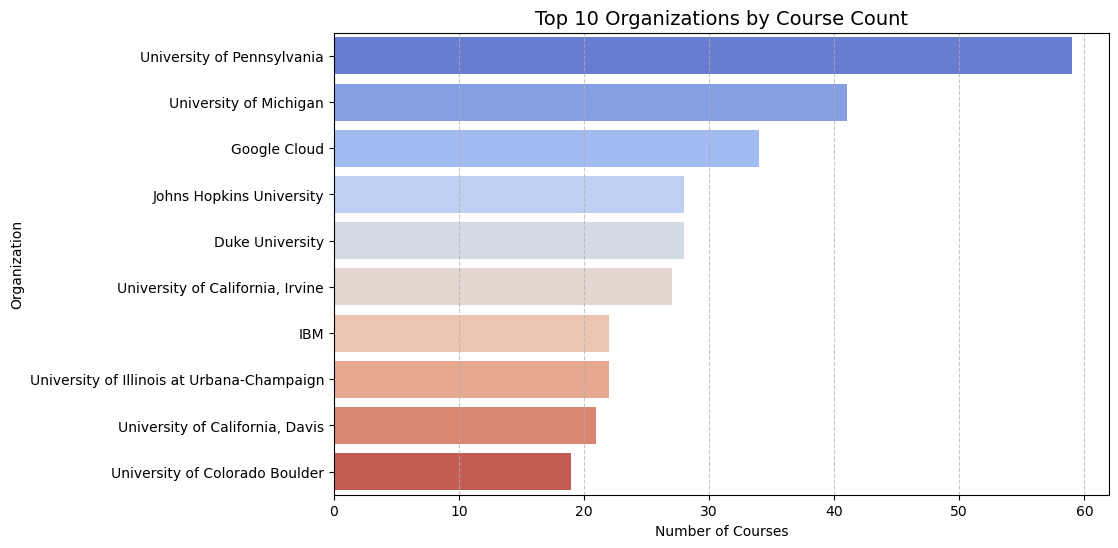

In [35]:
plt.figure(figsize=(10, 6))

top_orgs = df['organization'].value_counts().head(10)

sns.barplot(x=top_orgs.values, 
            y=top_orgs.index, 
            hue=top_orgs.index,
            dodge=False,  
            palette='coolwarm',
            legend=False)

plt.title('Top 10 Organizations by Course Count', fontsize=14)
plt.xlabel('Number of Courses')
plt.ylabel('Organization')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


University of Pennsylvania provides most courses, near 60. University of Michigan and Google cloud are followes near 40 and 35 courses. In top 10 organizations there are 9 well-know universities and only 1 private company.

### Highest Rated organizations

Looking into top 10 course providers and top 10 course providers using Bayesian Adjusted Rating (Adjusting for Reliability)

Ratings for each organisation

In [36]:
# Aggregate data to count the number of courses provided by each organisation and its average rating
org_avg_rating = df.groupby('organization')['rating'].agg(['mean', 'count']).reset_index()
org_avg_rating.columns = ['organization', 'avg_rating', 'course_count']

org_avg_rating.sort_values('avg_rating', ascending=False).head(10)


,organization,avg_rating,course_count
36,Hebrew University of Jerusalem,4.90,1
61,"Nanyang Technological University, Singapore",4.90,1
112,Universidade Estadual de Campinas,4.90,1
19,Crece con Google,4.90,1
51,London Business School,4.90,1
33,Google - Spectrum Sharing,4.90,1
83,ScrumTrek,4.90,1
113,Universidade de São Paulo,4.87,3
95,The University of Chicago,4.85,2
111,Universidad de los Andes,4.82,5


Adjusting the ratings based on the number of students enrolled, providing a more reliable score for courses with fewer ratings. The Bayesian average adjustment balances course provider evaluations by accounting for course count variability. While raw averages might favor smaller providers, the Bayesian approach offers a nuanced view. Larger organizations with many courses maintain their rankings, showing consistent quality. Smaller providers' ratings are moderated, reflecting a truer standing. This method helps identify top providers confidently, reflecting both high scores and consistent reliability.

Top 10 Organizations by Bayesian Average Rating:
                           organization  avg_rating  course_count  bayesian_avg_rating
                        Yale University        4.82            17                 4.78
               Berklee College of Music        4.81            14                 4.77
                   Macquarie University        4.80             9                 4.75
                    Stanford University        4.77            16                 4.74
               Universidad de los Andes        4.82             5                 4.74
              Universidade de São Paulo        4.87             3                 4.74
                    Universiteit Leiden        4.77             9                 4.73
               The Museum of Modern Art        4.78             6                 4.73
Universidad Nacional Autónoma de México        4.75            14                 4.73
               Arizona State University        4.77             7                

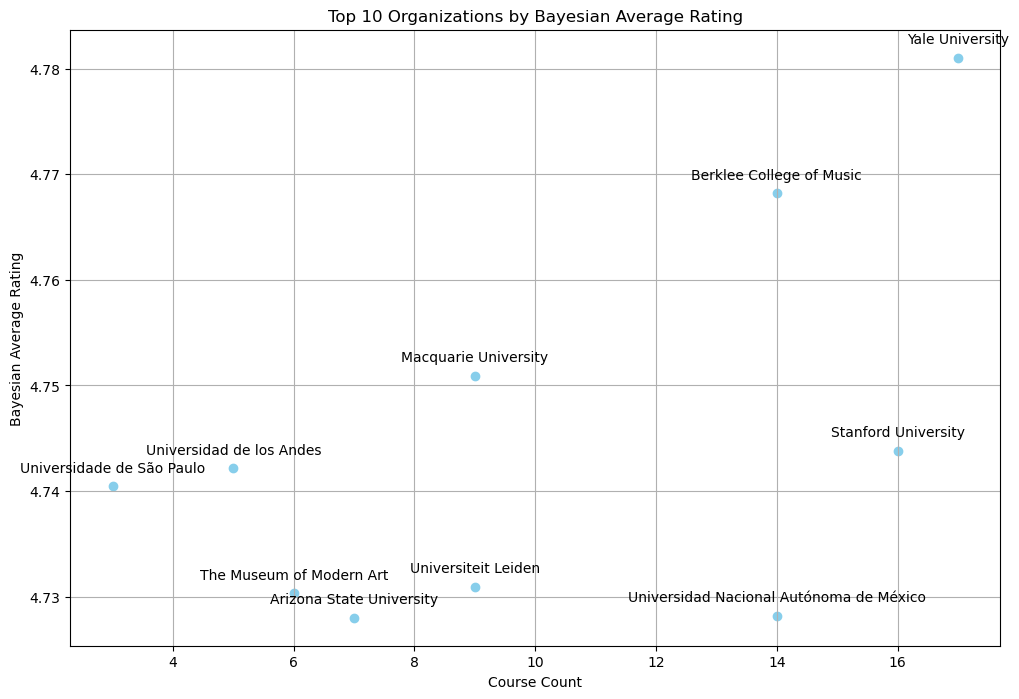

In [37]:

def bayesian_average(row, global_mean, count_col, m):
    return (row[count_col] * row['avg_rating'] + m * global_mean) / (row[count_col] + m)

global_avg_rating = df['rating'].mean()

m = round(org_avg_rating['course_count'].mean())

# Appling Bayesian average to normalize ratings for organizations
org_avg_rating['bayesian_avg_rating'] = org_avg_rating.apply(
    bayesian_average, 
    axis=1, 
    global_mean=global_avg_rating, 
    count_col='course_count', 
    m=m  # average course count per organization ~ 6
)

top_orgs = org_avg_rating.sort_values(by='bayesian_avg_rating', ascending=False).head(10)

print("Top 10 Organizations by Bayesian Average Rating:")
print(top_orgs[['organization', 'avg_rating', 'course_count', 'bayesian_avg_rating']].to_string(index=False))

plt.figure(figsize=(12,8))
plt.scatter(top_orgs['course_count'], top_orgs['bayesian_avg_rating'], color='skyblue')
plt.xlabel('Course Count')
plt.ylabel('Bayesian Average Rating')
plt.title('Top 10 Organizations by Bayesian Average Rating')
plt.grid(True)

# Annotate points with organization names
for i, row in top_orgs.iterrows():
    plt.annotate(row['organization'], (row['course_count'], row['bayesian_avg_rating']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


**Consistency in Top Providers:**
Universidad de los Andes and Universidade de São Paulo drop in the Bayesian ranking (from 10th to 5th, and 8th to 6th, respectively), suggesting their high ratings are adjusted due to fewer courses.

**Impact of Course Count on Rating:**
The Bayesian method penalizes organizations with fewer courses, like Hebrew University of Jerusalem and Nanyang Technological University, which drop out of the top 10, while larger organizations (e.g., Yale University) see slight drops in their ratings.

**New Top Providers:**
Yale University, Berklee College of Music, and Stanford University rise in the top 10, indicating their higher volume of courses provides a more reliable rating.

**Reliability of Smaller Institutions:**
Smaller institutions with fewer courses, such as Crece con Google and ScrumTrek, are adjusted down by the Bayesian method to provide a more accurate reflection of their ratings.

**Rating Adjustments:**
The Bayesian method adjusts ratings for both small and large organizations, ensuring that ratings are more reliable and less prone to overestimation based on limited data.

### Top Courses

Assumption: Courses focused on technical skills (e.g., programming, data science, IT, etc.) have higher enrollment numbers and ratings compared to non-technical courses (e.g., arts, humanities, social sciences).

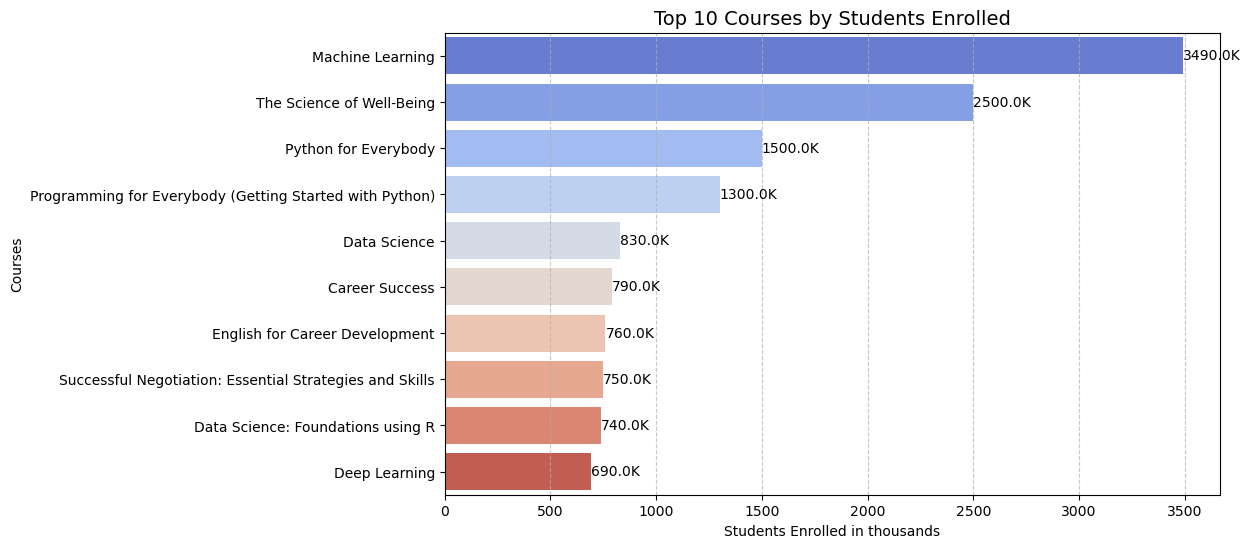

In [38]:
top_courses = df.groupby('title')['n_students'].sum().nlargest(10).reset_index()

# Convert student counts to thousands (K)
top_courses['n_students_k'] = top_courses['n_students'] / 1e3

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top_courses['n_students_k'],
                 y=top_courses['title'], 
                 hue=top_courses['title'],
                 palette='coolwarm',
                 dodge=False, 
                 legend=False)

# Add labels directly on the bars with an offset
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.2, 
            p.get_y() + p.get_height() / 2, 
            '{:.1f}K'.format(width), 
            ha='left', va='center', fontsize=10) 

plt.title('Top 10 Courses by Students Enrolled', fontsize=14)
plt.xlabel('Students Enrolled in thousands')
plt.ylabel('Courses')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The top courses focus heavily on technical skills, particularly in data science, machine learning, and programming (e.g., Python for Everybody and Deep Learning), reflecting the demand for expertise in these areas. Additionally, career development courses like Career Success and Successful Negotiation highlight the importance of soft skills for career growth. This mix of technical and personal development demonstrates the growing need for well-rounded professionals in the modern job market.

### Course Ratings by Difficulty Level

Assumption: Beginner-level courses have higher ratings compared to intermediate and advanced courses.

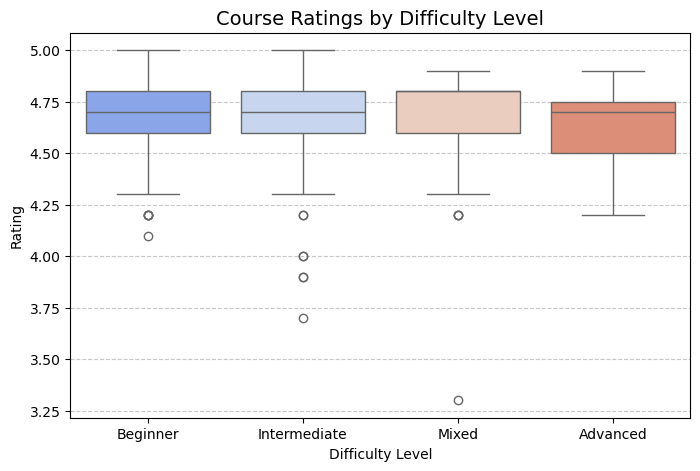

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='difficulty', y='rating', data=df, hue='difficulty', legend=False, palette='coolwarm')

plt.title('Course Ratings by Difficulty Level', fontsize=14)
plt.xlabel('Difficulty Level')
plt.ylabel('Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Overall Ratings: All difficulty levels have high median ratings, mostly around 4.5 - 4.8, suggesting that users generally rate courses favorably regardless of difficulty.

Variation Across Difficulty Levels: Beginner & Intermediate courses have slightly higher median ratings than Advanced courses.
Mixed-difficulty courses show a wider range of ratings, with more outliers (some ratings dropping below 3.75).

Overall, while all difficulty levels receive positive ratings, beginner and intermediate courses tend to have slightly higher ratings and more consistent feedback compared to advanced courses.

### Course Enrollment and Ratings

Assumption: Beginner courses have the highest enrollment numbers compared to intermediate and advanced courses.

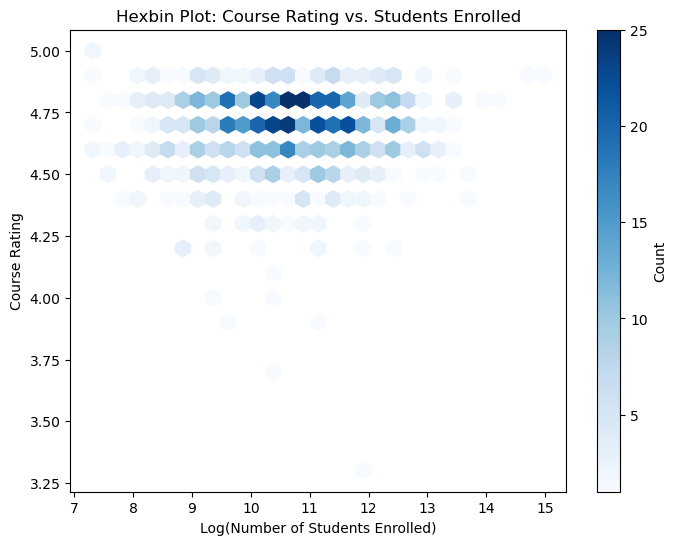

In [40]:
# Log-transform students count (to handle skewness)
df['log_n_students'] = np.log1p(df['n_students'])

plt.figure(figsize=(8,6))
plt.hexbin(df['log_n_students'], df['rating'], gridsize=30, cmap='Blues', mincnt=1)

plt.colorbar(label='Count')

plt.xlabel('Log(Number of Students Enrolled)')
plt.ylabel('Course Rating')
plt.title('Hexbin Plot: Course Rating vs. Students Enrolled')

plt.show()

Most courses have high ratings (4.5 - 5.0), with dense areas around 4.75.
Higher student enrollment doesn't lower ratings; no negative trend between student count and rating.
Some lower-rated courses (< 4.0) exist but are rare and have fewer enrollments.

Log transformation spreads out courses with low enrollments and compresses high enrollments, making trends easier to see and avoiding skewed distribution.

### Course Ratings by Certification Type

Assumption: Professional Certification Courses offering professional certifications are rated higher than other types of certifications due to their perceived value in career advancement.

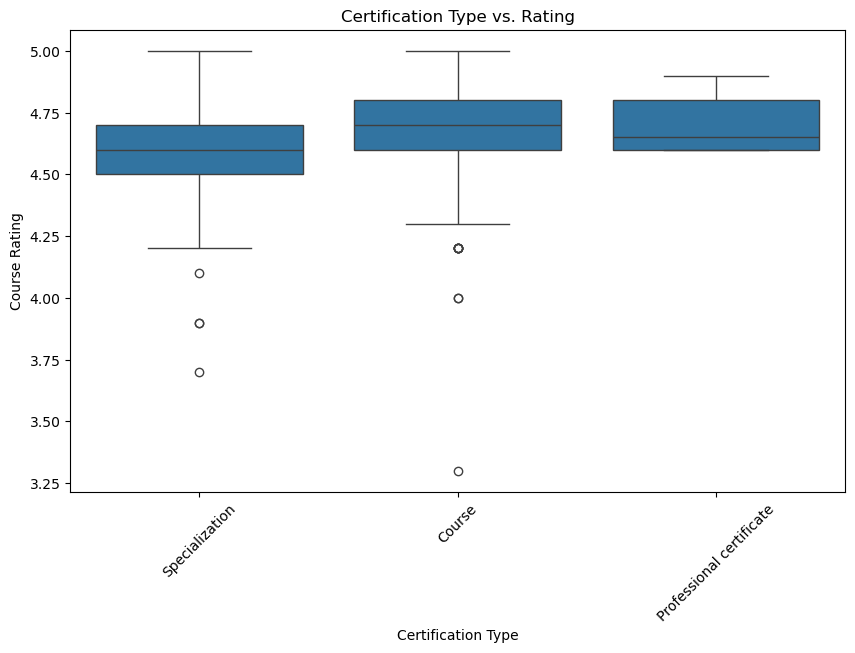

In [41]:
# Boxplot of Certification Type vs Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='certificate_type', y='rating')
plt.title('Certification Type vs. Rating')
plt.xlabel('Certification Type')
plt.ylabel('Course Rating')
plt.xticks(rotation=45)
plt.show()

All three certification types have high median ratings, indicating overall positive feedback.

Specialization and Course certifications have similar median ratings, but Specialization has a wider range of ratings and more outliers.

Professional Certificates have a slightly lower median rating and a narrower range of ratings, suggesting more consistent feedback but slightly lower overall satisfaction compared to the other two types.

# Key Takeaways

**1. Overall High Ratings**: The dataset shows consistently high ratings across all courses, with an average rating of 4.68 and a small standard deviation, indicating general satisfaction among learners.

**2. Beginner Courses Dominate**: Beginner level courses are the most popular, accounting for the largest share across all certification types. This suggests a strong demand for entry-level education.

**3. Popularity Doesn't Compromise Quality**: Courses with higher enrollment numbers do not show a decline in ratings. This indicates that popular courses maintain high quality despite large numbers of students.

**4. 'Course' Certification Type Leads**: The 'Course' certification type is the most common, followed by 'Specialization' and 'Professional Certificates'. Although 'Professional Certificates' have a slightly lower median rating, they offer more consistent feedback.

**5. Top Providers Are Prestigious Institutions**: Leading providers include renowned universities and institutions such as the University of Pennsylvania, University of Michigan, and Google Cloud. These providers dominate the course offerings.

**6. Technical Skills in High Demand**: The top courses focus heavily on technical skills like data science, machine learning, and programming, reflecting the demand for expertise in these areas.

**7. Importance of Soft Skills**: Courses on career development and negotiation highlight the need for well-rounded professionals, showcasing the importance of soft skills alongside technical knowledge.

**8. Bayesian Adjustments for Accurate Ratings**: The Bayesian method provides a more accurate reflection of course ratings by adjusting for the number of courses offered by each institution. This helps identify reliable ratings and adjust for potential overestimations.


# Next Steps in Analysis

**1. Collect More Data**:
- Gather student reviews and comments to gain deeper insights into their experiences and opinions.

**2. Sentiment Analysis**:
- Perform sentiment analysis on student reviews and comments to understand the overall sentiment and identify common themes or issues.

**3. Detailed Provider Analysis**:
- Dive deeper into the course providers, examining factors such as provider reputation, course quality, and provider-specific trends.

**4. Course Costing Data**:
- Collect data on course costs and analyze how pricing affects enrollment rates and student ratings.
- Explore the relationship between course cost, quality, and overall value perceived by students.
